In [159]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats.api as sms
import math
import time
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None) 
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.options.mode.chained_assignment = None  # default='warn'

# Loading in the Data.
ins_file = 'abalone'
ext = '.data'
data = pd.read_csv(ins_file+ext, sep=",", header=None)

# Assigning Data Headers
column_headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell', 'Rings']
data.columns = column_headers


In [160]:
# Data Checking and Verification
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell             0
Rings             0
dtype: int64

In [161]:
data.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell              926
Rings               28
dtype: int64

In [162]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [163]:
data.describe()

Length    Diameter      Height  Whole_weight  Shucked_weight  \
count 4177.000000 4177.000000 4177.000000   4177.000000     4177.000000   
mean     0.523992    0.407881    0.139516      0.828742        0.359367   
std      0.120093    0.099240    0.041827      0.490389        0.221963   
min      0.075000    0.055000    0.000000      0.002000        0.001000   
25%      0.450000    0.350000    0.115000      0.441500        0.186000   
50%      0.545000    0.425000    0.140000      0.799500        0.336000   
75%      0.615000    0.480000    0.165000      1.153000        0.502000   
max      0.815000    0.650000    1.130000      2.825500        1.488000   

       Viscera_weight       Shell       Rings  
count     4177.000000 4177.000000 4177.000000  
mean         0.180594    0.238831    9.933684  
std          0.109614    0.139203    3.224169  
min          0.000500    0.001500    1.000000  
25%          0.093500    0.130000    8.000000  
50%          0.171000    0.234000    9.000000  
75%          0.253000    0.329000   11.000000  
max          0.760000    1.005000   29.000000

In [164]:
description = data.describe()
description.to_excel("description.xlsx")  

In [165]:
data.shape

(4177, 9)

In [166]:
data.head(25)

Sex   Length  Diameter   Height  Whole_weight  Shucked_weight  \
0    M 0.455000  0.365000 0.095000      0.514000        0.224500   
1    M 0.350000  0.265000 0.090000      0.225500        0.099500   
2    F 0.530000  0.420000 0.135000      0.677000        0.256500   
3    M 0.440000  0.365000 0.125000      0.516000        0.215500   
4    I 0.330000  0.255000 0.080000      0.205000        0.089500   
5    I 0.425000  0.300000 0.095000      0.351500        0.141000   
6    F 0.530000  0.415000 0.150000      0.777500        0.237000   
7    F 0.545000  0.425000 0.125000      0.768000        0.294000   
8    M 0.475000  0.370000 0.125000      0.509500        0.216500   
9    F 0.550000  0.440000 0.150000      0.894500        0.314500   
10   F 0.525000  0.380000 0.140000      0.606500        0.194000   
11   M 0.430000  0.350000 0.110000      0.406000        0.167500   
12   M 0.490000  0.380000 0.135000      0.541500        0.217500   
13   F 0.535000  0.405000 0.145000      0.684500        0.272500   
14   F 0.470000  0.355000 0.100000      0.475500        0.167500   
15   M 0.500000  0.400000 0.130000      0.664500        0.258000   
16   I 0.355000  0.280000 0.085000      0.290500        0.095000   
17   F 0.440000  0.340000 0.100000      0.451000        0.188000   
18   M 0.365000  0.295000 0.080000      0.255500        0.097000   
19   M 0.450000  0.320000 0.100000      0.381000        0.170500   
20   M 0.355000  0.280000 0.095000      0.245500        0.095500   
21   I 0.380000  0.275000 0.100000      0.225500        0.080000   
22   F 0.565000  0.440000 0.155000      0.939500        0.427500   
23   F 0.550000  0.415000 0.135000      0.763500        0.318000   
24   F 0.615000  0.480000 0.165000      1.161500        0.513000   

    Viscera_weight    Shell  Rings  
0         0.101000 0.150000     15  
1         0.048500 0.070000      7  
2         0.141500 0.210000      9  
3         0.114000 0.155000     10  
4         0.039500 0.055000      7  
5         0.077500 0.120000      8  
6         0.141500 0.330000     20  
7         0.149500 0.260000     16  
8         0.112500 0.165000      9  
9         0.151000 0.320000     19  
10        0.147500 0.210000     14  
11        0.081000 0.135000     10  
12        0.095000 0.190000     11  
13        0.171000 0.205000     10  
14        0.080500 0.185000     10  
15        0.133000 0.240000     12  
16        0.039500 0.115000      7  
17        0.087000 0.130000     10  
18        0.043000 0.100000      7  
19        0.075000 0.115000      9  
20        0.062000 0.075000     11  
21        0.049000 0.085000     10  
22        0.214000 0.270000     12  
23        0.210000 0.200000      9  
24        0.301000 0.305000     10

In [167]:
avg_gend = data.groupby(['Sex']).mean()
avg_gend.to_excel("avg_gend.xlsx")  

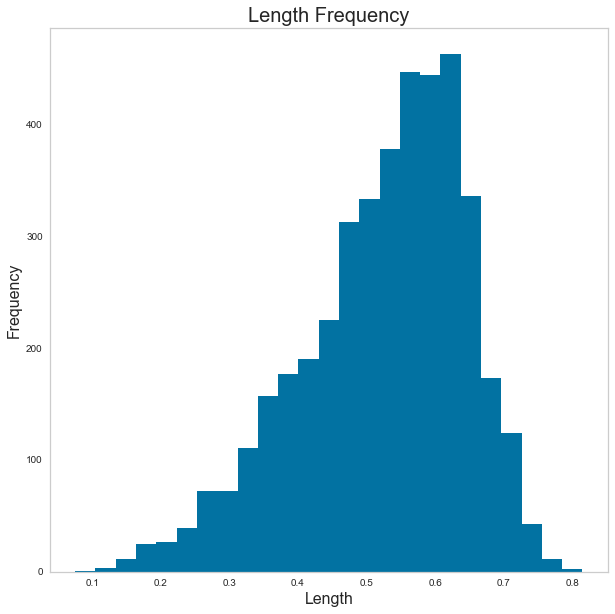

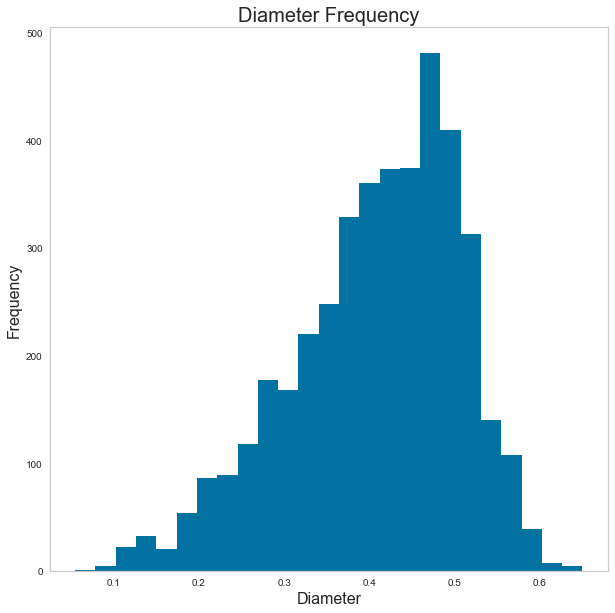

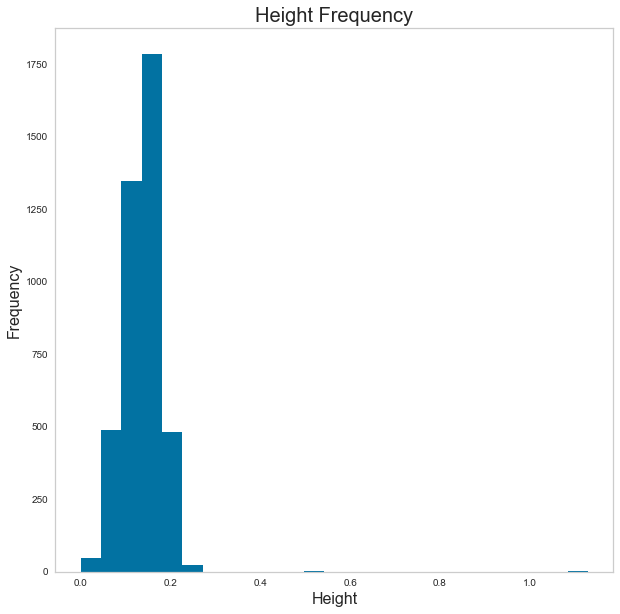

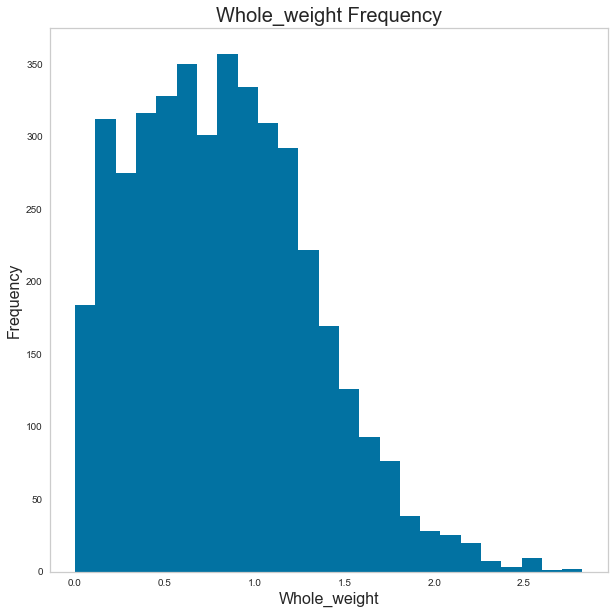

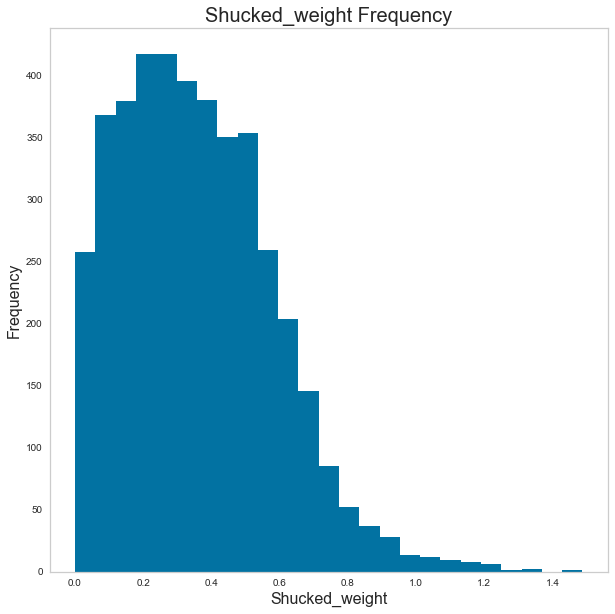

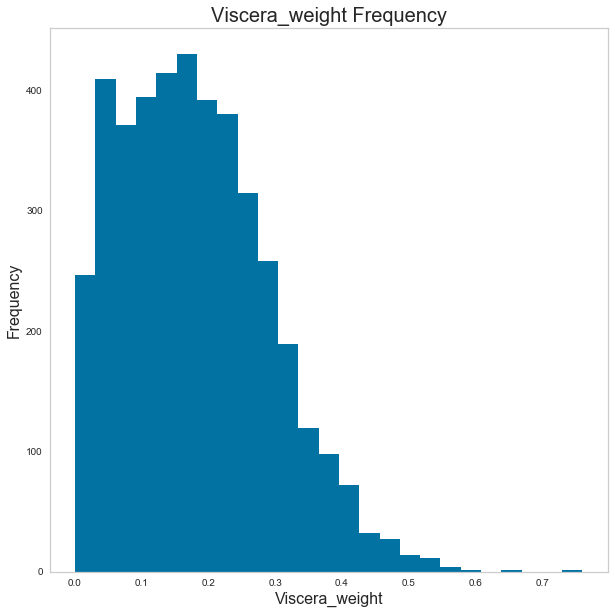

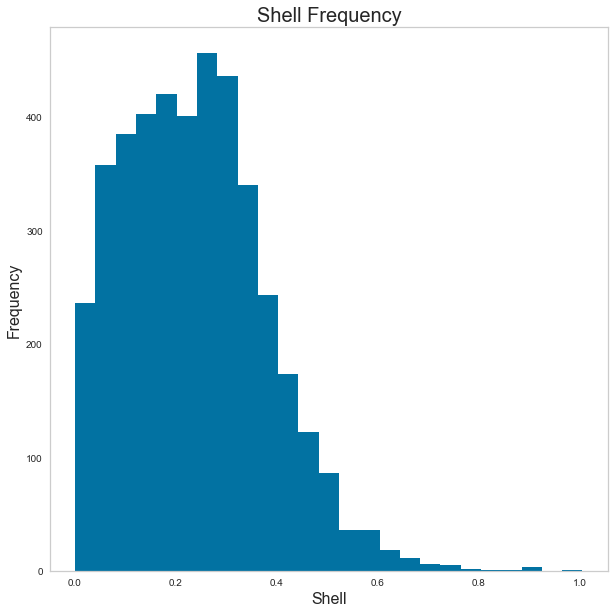

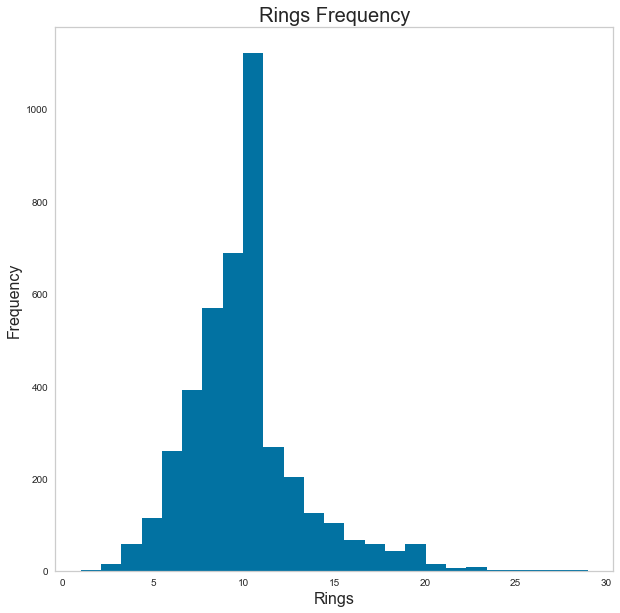

In [168]:
# Plotting clear histograms to observe normal distributions
list_loop = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell', 'Rings']
freq = ' Frequency'
directory = 'images/'
img_ext = '.png'

for i in list_loop:
    plot_title = i+freq
    plot_save = directory+i+img_ext
    plt.figure(figsize=(10,10))
    data[i].plot(kind='hist', bins=25)
    plt.xlabel(i,fontsize=16)
    plt.grid()
    plt.ylabel('Frequency',fontsize=16)
    plt.title(plot_title,fontsize=20)
    plt.savefig(plot_save)


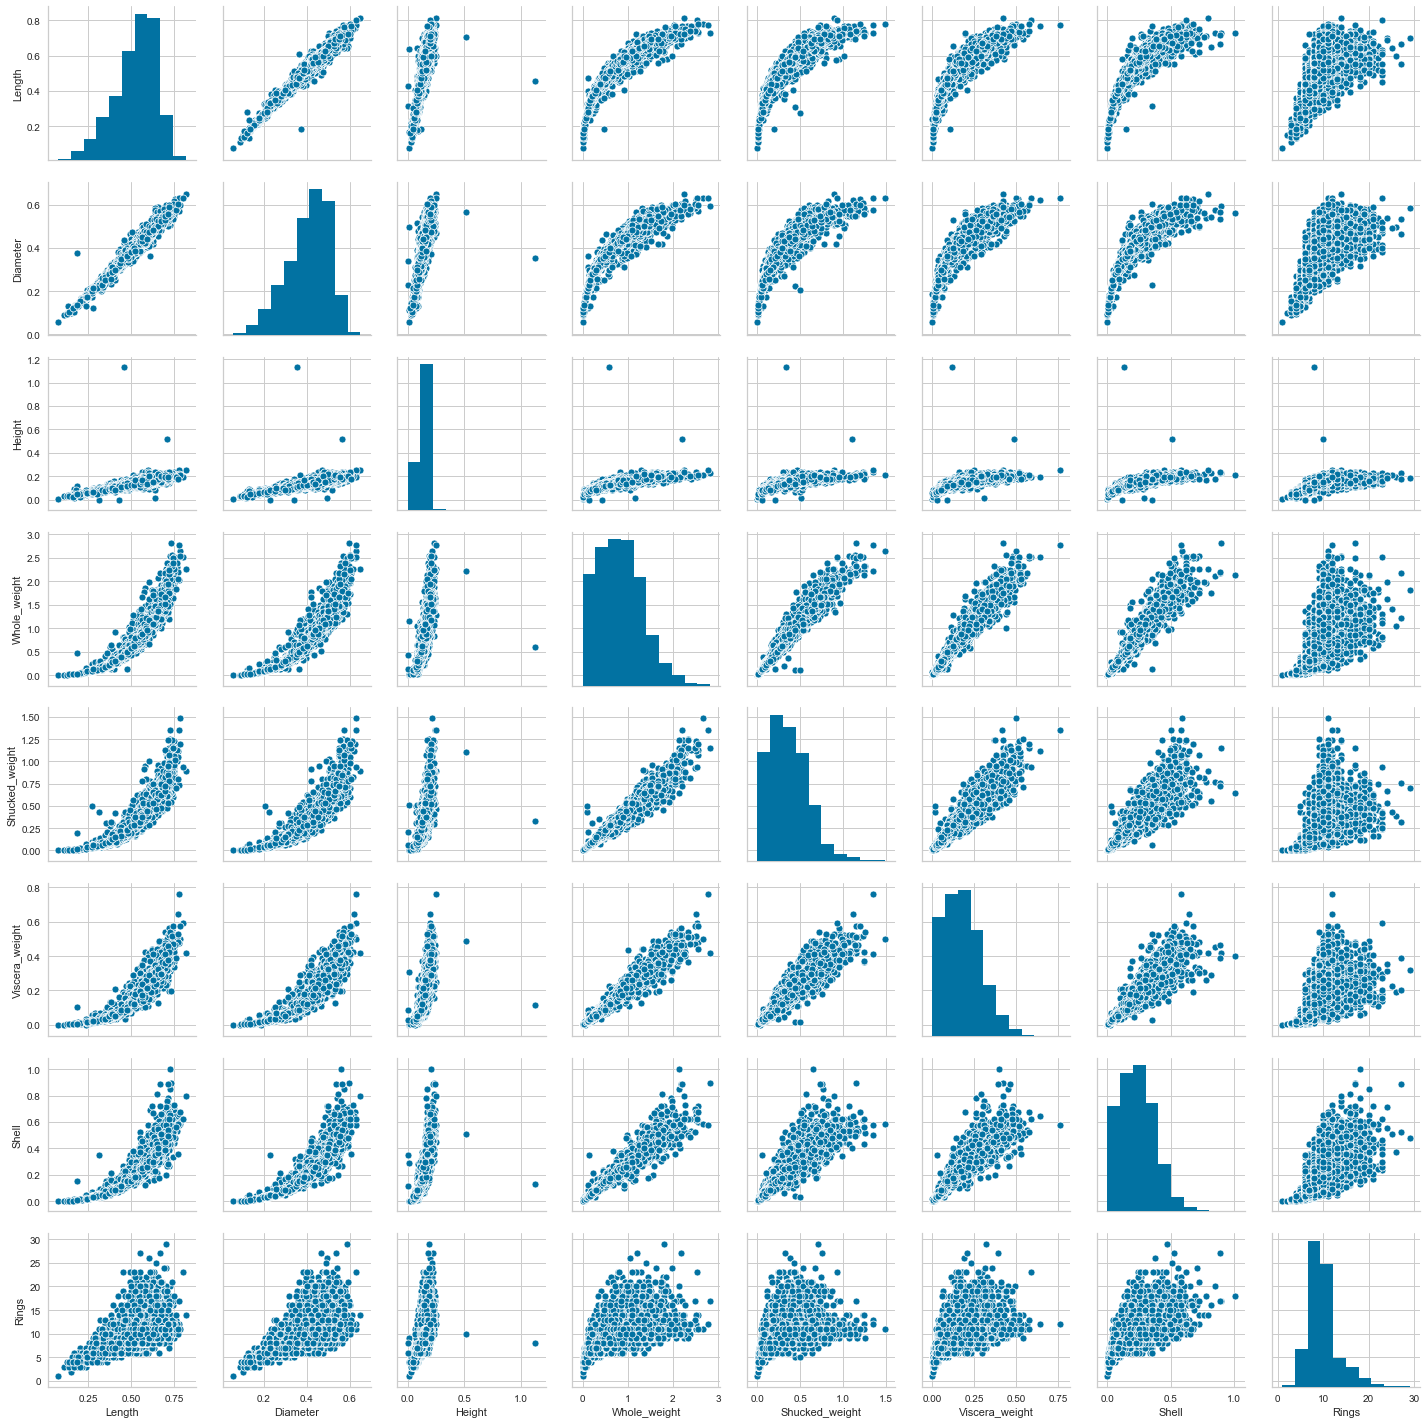

In [169]:
sns.pairplot(data[list_loop])

In [170]:
# Ordinal Encoding the Sex column, where 0 = F, I = 1, M = 2. This will be primarily to determine correlation between features

encoder = OrdinalEncoder()
df = data
df["Sex_code"] = encoder.fit_transform(df.Sex.values.reshape(-1, 1)).astype('int64')
df = df[['Sex', 'Sex_code', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell', 'Rings']]

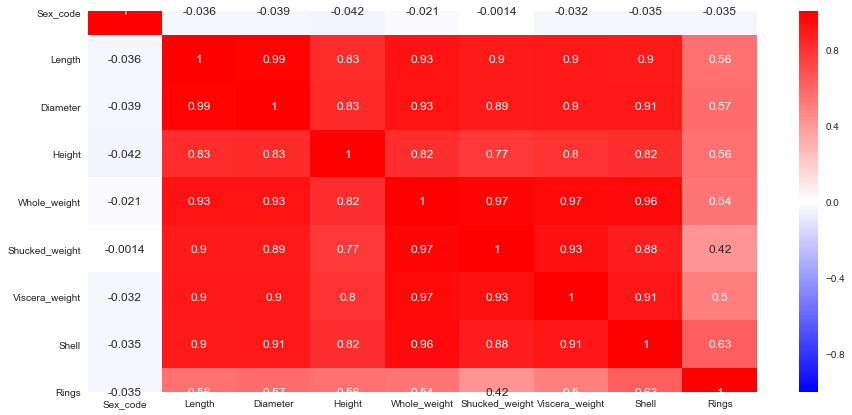

In [171]:
# Make a heatmap on the correlations between variables in the hotel data:
data_correlations = df.corr()
data_correlations
plt.figure(figsize=(15,7))
fig = sns.heatmap(data_correlations, vmin = -1, vmax = 1, cmap = 'bwr', annot=True)
fig.figure.savefig("images/Heatmap.png")

In [172]:
# Next stage would be too set up the Ring column into various classes.
# I.e. Class 1 = 0 - 7, Class 2 = 8 - 10, Class 3 = 11 - 15, Class 4 > 15
df['Rings_Class'] = df['Rings']

df.loc[(df['Rings_Class'] >= 0) & (df['Rings_Class'] <= 7),'Rings_Class'] = 1
df.loc[(df['Rings_Class'] > 7) & (df['Rings_Class'] <= 10),'Rings_Class'] = 2
df.loc[(df['Rings_Class'] > 10) & (df['Rings_Class'] <= 15),'Rings_Class'] = 3
df.loc[(df['Rings_Class'] > 15),'Rings_Class'] = 4

In [173]:
df

Sex  Sex_code   Length  Diameter   Height  Whole_weight  Shucked_weight  \
0      M         2 0.455000  0.365000 0.095000      0.514000        0.224500   
1      M         2 0.350000  0.265000 0.090000      0.225500        0.099500   
2      F         0 0.530000  0.420000 0.135000      0.677000        0.256500   
3      M         2 0.440000  0.365000 0.125000      0.516000        0.215500   
4      I         1 0.330000  0.255000 0.080000      0.205000        0.089500   
5      I         1 0.425000  0.300000 0.095000      0.351500        0.141000   
6      F         0 0.530000  0.415000 0.150000      0.777500        0.237000   
7      F         0 0.545000  0.425000 0.125000      0.768000        0.294000   
8      M         2 0.475000  0.370000 0.125000      0.509500        0.216500   
9      F         0 0.550000  0.440000 0.150000      0.894500        0.314500   
10     F         0 0.525000  0.380000 0.140000      0.606500        0.194000   
11     M         2 0.430000  0.350000 0.110000      0.406000        0.167500   
12     M         2 0.490000  0.380000 0.135000      0.541500        0.217500   
13     F         0 0.535000  0.405000 0.145000      0.684500        0.272500   
14     F         0 0.470000  0.355000 0.100000      0.475500        0.167500   
15     M         2 0.500000  0.400000 0.130000      0.664500        0.258000   
16     I         1 0.355000  0.280000 0.085000      0.290500        0.095000   
17     F         0 0.440000  0.340000 0.100000      0.451000        0.188000   
18     M         2 0.365000  0.295000 0.080000      0.255500        0.097000   
19     M         2 0.450000  0.320000 0.100000      0.381000        0.170500   
20     M         2 0.355000  0.280000 0.095000      0.245500        0.095500   
21     I         1 0.380000  0.275000 0.100000      0.225500        0.080000   
22     F         0 0.565000  0.440000 0.155000      0.939500        0.427500   
23     F         0 0.550000  0.415000 0.135000      0.763500        0.318000   
24     F         0 0.615000  0.480000 0.165000      1.161500        0.513000   
25     F         0 0.560000  0.440000 0.140000      0.928500        0.382500   
26     F         0 0.580000  0.450000 0.185000      0.995500        0.394500   
27     M         2 0.590000  0.445000 0.140000      0.931000        0.356000   
28     M         2 0.605000  0.475000 0.180000      0.936500        0.394000   
29     M         2 0.575000  0.425000 0.140000      0.863500        0.393000   
30     M         2 0.580000  0.470000 0.165000      0.997500        0.393500   
31     F         0 0.680000  0.560000 0.165000      1.639000        0.605500   
32     M         2 0.665000  0.525000 0.165000      1.338000        0.551500   
33     F         0 0.680000  0.550000 0.175000      1.798000        0.815000   
34     F         0 0.705000  0.550000 0.200000      1.709500        0.633000   
35     M         2 0.465000  0.355000 0.105000      0.479500        0.227000   
36     F         0 0.540000  0.475000 0.155000      1.217000        0.530500   
37     F         0 0.450000  0.355000 0.105000      0.522500        0.237000   
38     F         0 0.575000  0.445000 0.135000      0.883000        0.381000   
39     M         2 0.355000  0.290000 0.090000      0.327500        0.134000   
40     F         0 0.450000  0.335000 0.105000      0.425000        0.186500   
41     F         0 0.550000  0.425000 0.135000      0.851500        0.362000   
42     I         1 0.240000  0.175000 0.045000      0.070000        0.031500   
43     I         1 0.205000  0.150000 0.055000      0.042000        0.025500   
44     I         1 0.210000  0.150000 0.050000      0.042000        0.017500   
45     I         1 0.390000  0.295000 0.095000      0.203000        0.087500   
46     M         2 0.470000  0.370000 0.120000      0.579500        0.293000   
47     F         0 0.460000  0.375000 0.120000      0.460500        0.177500   
48     I         1 0.325000  0.245000 0.070000      0.161000        0.075500   
49   

In [174]:
# Scaling
scaler = MinMaxScaler()
df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell']] = scaler.fit_transform(df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell']])

# One-Hot Encode the Sex Column.

df2 = pd.get_dummies(data=df, columns=['Sex'])
df2 = df2.drop(['Sex_code'], axis=1)
df2

Length  Diameter   Height  Whole_weight  Shucked_weight  \
0    0.513514  0.521008 0.084071      0.181335        0.150303   
1    0.371622  0.352941 0.079646      0.079157        0.066241   
2    0.614865  0.613445 0.119469      0.239065        0.171822   
3    0.493243  0.521008 0.110619      0.182044        0.144250   
4    0.344595  0.336134 0.070796      0.071897        0.059516   
5    0.472973  0.411765 0.084071      0.123783        0.094149   
6    0.614865  0.605042 0.132743      0.274659        0.158709   
7    0.635135  0.621849 0.110619      0.271294        0.197041   
8    0.540541  0.529412 0.110619      0.179741        0.144923   
9    0.641892  0.647059 0.132743      0.316097        0.210827   
10   0.608108  0.546218 0.123894      0.214096        0.129792   
11   0.479730  0.495798 0.097345      0.143085        0.111970   
12   0.560811  0.546218 0.119469      0.191075        0.145595   
13   0.621622  0.588235 0.128319      0.241721        0.182582   
14   0.533784  0.504202 0.088496      0.167700        0.111970   
15   0.574324  0.579832 0.115044      0.234638        0.172831   
16   0.378378  0.378151 0.075221      0.102178        0.063215   
17   0.493243  0.478992 0.088496      0.159022        0.125757   
18   0.391892  0.403361 0.070796      0.089782        0.064560   
19   0.506757  0.445378 0.088496      0.134231        0.113988   
20   0.378378  0.378151 0.084071      0.086240        0.063551   
21   0.412162  0.369748 0.088496      0.079157        0.053127   
22   0.662162  0.647059 0.137168      0.332035        0.286819   
23   0.641892  0.605042 0.119469      0.269701        0.213181   
24   0.729730  0.714286 0.146018      0.410661        0.344317   
25   0.655405  0.647059 0.123894      0.328139        0.256557   
26   0.682432  0.663866 0.163717      0.351868        0.264627   
27   0.695946  0.655462 0.123894      0.329024        0.238736   
28   0.716216  0.705882 0.159292      0.330972        0.264291   
29   0.675676  0.621849 0.123894      0.305118        0.263618   
30   0.682432  0.697479 0.146018      0.352577        0.263954   
31   0.817568  0.848739 0.146018      0.579777        0.406523   
32   0.797297  0.789916 0.146018      0.473172        0.370208   
33   0.817568  0.831933 0.154867      0.636090        0.547411   
34   0.851351  0.831933 0.176991      0.604746        0.425017   
35   0.527027  0.504202 0.092920      0.169116        0.151984   
36   0.628378  0.705882 0.137168      0.430317        0.356086   
37   0.506757  0.504202 0.092920      0.184346        0.158709   
38   0.675676  0.655462 0.119469      0.312024        0.255548   
39   0.378378  0.394958 0.079646      0.115282        0.089442   
40   0.506757  0.470588 0.092920      0.149814        0.124748   
41   0.641892  0.621849 0.119469      0.300868        0.242771   
42   0.222973  0.201681 0.039823      0.024084        0.020511   
43   0.175676  0.159664 0.048673      0.014167        0.016476   
44   0.182432  0.159664 0.044248      0.014167        0.011096   
45   0.425676  0.403361 0.084071      0.071188        0.058171   
46   0.533784  0.529412 0.106195      0.204533        0.196369   
47   0.520270  0.537815 0.106195      0.162387        0.118695   
48   0.337838  0.319328 0.061947      0.056313        0.050101   
49   0.608108  0.621849 0.141593      0.295201        0.237727   
50   0.601351  0.596639 0.106195      0.210023        0.159718   
51   0.439189  0.445378 0.084071      0.106605        0.089106   
52   0.554054  0.512605 0.115044      0.191075        0.173840   
53   0.533784  0.512605 0.106195      0.168408        0.140888   
54   0.445946  0.428571 0.088496      0.135647        0.115669   
55   0.574324  0.579832 0.123894      0.233575        0.171822   
56   0.500000  0.495798 0.106195      0.156012        0.128447   
57   0.533784  0.554622 0.119469      0.208075        0.185272   
58   0.229730  0.226891 0.053097      0.029750        0.027572   
59   0.581081  0.579832 0.110619      0.205773 

In [175]:
df2.describe()

Length    Diameter      Height  Whole_weight  Shucked_weight  \
count 4177.000000 4177.000000 4177.000000   4177.000000     4177.000000   
mean     0.606746    0.593078    0.123466      0.292808        0.241000   
std      0.162288    0.166790    0.037015      0.173681        0.149269   
min      0.000000    0.000000    0.000000      0.000000        0.000000   
25%      0.506757    0.495798    0.101770      0.155658        0.124412   
50%      0.635135    0.621849    0.123894      0.282451        0.225286   
75%      0.729730    0.714286    0.146018      0.407650        0.336920   
max      1.000000    1.000000    1.000000      1.000000        1.000000   

       Viscera_weight       Shell       Rings  Rings_Class       Sex_F  \
count     4177.000000 4177.000000 4177.000000  4177.000000 4177.000000   
mean         0.237121    0.236503    9.933684     2.208044    0.312904   
std          0.144324    0.138717    3.224169     0.831638    0.463731   
min          0.000000    0.000000    1.000000     1.000000    0.000000   
25%          0.122449    0.128052    8.000000     2.000000    0.000000   
50%          0.224490    0.231689    9.000000     2.000000    0.000000   
75%          0.332456    0.326358   11.000000     3.000000    1.000000   
max          1.000000    1.000000   29.000000     4.000000    1.000000   

            Sex_I       Sex_M  
count 4177.000000 4177.000000  
mean     0.321283    0.365813  
std      0.467025    0.481715  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

In [176]:
# Features columns chosen for prediction.
feature_cols = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell','Sex_F','Sex_I','Sex_M']

# Assigning Feature columns to X and y for Test Train Split
X = df2[feature_cols]
y = df2[['Rings_Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.6,random_state=99)

In [18]:
# Set up for Neuron Experimental runs for Task 2
Neuron_Experiments = []
Neuron_Experiments_Mean = []
Neuron_Experiments_Lower = []
Neuron_Experiments_Upper = []
neurons = [5, 10, 15, 20, 25, 50, 100, 250, 500, 1000]
name = ['Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10', 'Mean', 'Lower', 'Upper']

for neuron in neurons:
    Ex_no = 1
    print('Neurons: '+str(neuron))
    accuracy = []
    while Ex_no < 1: #for 10 experiments change 1 to 11
        print('Experiment: '+str(Ex_no))
        classifier = MLPClassifier(hidden_layer_sizes=(neuron,))
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        ex_acc = accuracy_score(y_test, y_pred)
        accuracy.append(ex_acc)
        Ex_no = Ex_no + 1
    mean = np.mean(accuracy)
    confidence_interval = np.array(accuracy)
    lower, upper = sms.DescrStatsW(confidence_interval).tconfint_mean()
    
    Neuron_Experiments_Mean.append(mean)
    Neuron_Experiments_Lower.append(lower)
    Neuron_Experiments_Upper.append(upper)
    Neuron_Experiments.append(accuracy)
    

Neuron_df = pd.DataFrame(Neuron_Experiments)
Neuron_df = Neuron_df.transpose()
Neuron_df.columns = neurons

a_series = pd.Series(Neuron_Experiments_Mean, index = Neuron_df.columns)
Neuron_df = Neuron_df.append(a_series, ignore_index=True)

a_series = pd.Series(Neuron_Experiments_Lower, index = Neuron_df.columns)
Neuron_df = Neuron_df.append(a_series, ignore_index=True)

a_series = pd.Series(Neuron_Experiments_Upper, index = Neuron_df.columns)
Neuron_df = Neuron_df.append(a_series, ignore_index=True)
Neuron_df['Name'] = name

Neurons: 5
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 10
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 15
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 20
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 25
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 50
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 100
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 250
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 500
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4
Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neurons: 1000
Experiment: 1
Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3
Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6
Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9
Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
Neuron_df

5       10       15       20       25       50      100      250  \
0  0.599521 0.590746 0.605903 0.601915 0.607898 0.609493 0.615876 0.634224   
1  0.603909 0.595134 0.607898 0.604308 0.607499 0.611488 0.619465 0.630634   
2  0.595134 0.589549 0.606701 0.602712 0.615477 0.609095 0.619067 0.621859   
3  0.590746 0.599122 0.603909 0.609892 0.601915 0.609493 0.619864 0.624651   
4  0.602314 0.609493 0.598325 0.609892 0.594735 0.611089 0.613881 0.630634   
5  0.573993 0.603111 0.604308 0.611089 0.608696 0.613881 0.617870 0.626247   
6  0.553251 0.606701 0.607499 0.603111 0.608297 0.609892 0.618269 0.626645   
7  0.594735 0.595931 0.601117 0.606302 0.603111 0.610690 0.617471 0.626247   
8  0.599521 0.604308 0.604707 0.599521 0.610690 0.612286 0.612286 0.627044   
9  0.593538 0.603510 0.603909 0.608297 0.609493 0.614679 0.615876 0.623454   
10 0.590666 0.599761 0.604428 0.605704 0.606781 0.611209 0.616992 0.627164   
11 0.579506 0.594927 0.602326 0.602869 0.602733 0.609843 0.615214 0.624507   
12 0.601826 0.604594 0.606529 0.608539 0.610829 0.612574 0.618771 0.629821   

        500     1000    Name  
0  0.633426 0.627044   Exp 1  
1  0.626645 0.648983   Exp 2  
2  0.630235 0.632629   Exp 3  
3  0.629039 0.633825   Exp 4  
4  0.630235 0.635022   Exp 5  
5  0.632230 0.631831   Exp 6  
6  0.630634 0.631432   Exp 7  
7  0.631432 0.637415   Exp 8  
8  0.628241 0.626247   Exp 9  
9  0.629039 0.628241  Exp 10  
10 0.630116 0.633267    Mean  
11 0.628698 0.628578   Lower  
12 0.631533 0.637956   Upper

In [20]:
# Set up for Learning Rate Experimental runs for Task 3
# ideal neuron is 1000
neuron = 1000
LR_Experiments = []
LR_Experiments_Mean = []
LR_Experiments_Lower = []
LR_Experiments_Upper = []
LRs = [0.01, 0.001, 0.0001, 0.00005, 0.00001, 0.000001]
LRstring = ['0.01', '0.001', '0.0001', '0.00005', '0.00001',' 0.000001']
name = ['Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10', 'Mean', 'Lower', 'Upper']

for LR in LRs:
    Ex_no = 1
    print('Learning Rate: '+str(LR))
    accuracy = []
    while Ex_no < 1: #for 10 experiments change 1 to 11
        print('Experiment: '+str(Ex_no))
        classifier = MLPClassifier(hidden_layer_sizes = (neuron,), solver = 'sgd', learning_rate_init = LR)
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        ex_acc = accuracy_score(y_test, y_pred)
        accuracy.append(ex_acc)
        Ex_no = Ex_no + 1
    mean = np.mean(accuracy)
    confidence_interval = np.array(accuracy)
    lower, upper = sms.DescrStatsW(confidence_interval).tconfint_mean()
    
    LR_Experiments_Mean.append(mean)
    LR_Experiments_Lower.append(lower)
    LR_Experiments_Upper.append(upper)
    LR_Experiments.append(accuracy)
    

LR_df = pd.DataFrame(LR_Experiments)
LR_df = LR_df.transpose()
LR_df.columns = LRstring

a_series = pd.Series(LR_Experiments_Mean, index = LR_df.columns)
LR_df = LR_df.append(a_series, ignore_index=True)

a_series = pd.Series(LR_Experiments_Lower, index = LR_df.columns)
LR_df = LR_df.append(a_series, ignore_index=True)

a_series = pd.Series(LR_Experiments_Upper, index = LR_df.columns)
LR_df = LR_df.append(a_series, ignore_index=True)
LR_df['Name'] = name

Learning Rate: 0.01
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 0.001
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 0.0001
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 5e-05
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 1e-05
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 1e-06
Experiment: 1
Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
LR_df

0.01    0.001   0.0001  0.00005  0.00001   0.000001x    Name
0  0.607100 0.573195 0.435979 0.435979 0.435979    0.223375   Exp 1
1  0.606302 0.577184 0.435979 0.435979 0.435979    0.062226   Exp 2
2  0.605505 0.577583 0.435979 0.435979 0.435979    0.167531   Exp 3
3  0.605505 0.582369 0.435979 0.435979 0.435979    0.296769   Exp 4
4  0.607898 0.581572 0.435979 0.435979 0.435979    0.071400   Exp 5
5  0.605903 0.579577 0.435979 0.435979 0.436777    0.297567   Exp 6
6  0.608696 0.575987 0.435979 0.435979 0.435979    0.059035   Exp 7
7  0.608696 0.581572 0.435979 0.435979 0.435979    0.216594   Exp 8
8  0.604308 0.579577 0.435979 0.435979 0.449940    0.393299   Exp 9
9  0.605505 0.575987 0.435979 0.435979 0.435979    0.132828  Exp 10
10 0.606542 0.578460 0.435979 0.435979 0.437455    0.192062    Mean
11 0.605472 0.576334 0.435979 0.435979 0.434312    0.110361   Lower
12 0.607611 0.580586 0.435979 0.435979 0.440598    0.273764   Upper

In [22]:
# Set up for Layers Experimental runs for Task 4
# ideal neuron is 500
neuron = 1000
Layers_Experiments = []
Layers_Experiments_Mean = []
Layers_Experiments_Lower = []
Layers_Experiments_Upper = []
Layers = [(neuron,),(neuron,neuron),(neuron,neuron,neuron),(neuron,neuron,neuron,neuron)]
LayersStr = ['1','2','3','4']
name = ['Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10', 'Mean', 'Lower', 'Upper']

for Layer in Layers:
    Ex_no = 1
    print('Layer: '+str(Layer))
    accuracy = []
    while Ex_no < 1: #for 10 experiments change 1 to 11
        print('Experiment: '+str(Ex_no))
        classifier = MLPClassifier(hidden_layer_sizes = Layer, )
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        ex_acc = accuracy_score(y_test, y_pred)
        accuracy.append(ex_acc)
        Ex_no = Ex_no + 1
    mean = np.mean(accuracy)
    confidence_interval = np.array(accuracy)
    lower, upper = sms.DescrStatsW(confidence_interval).tconfint_mean()
    
    Layers_Experiments_Mean.append(mean)
    Layers_Experiments_Lower.append(lower)
    Layers_Experiments_Upper.append(upper)
    Layers_Experiments.append(accuracy)
    

Layers_df = pd.DataFrame(Layers_Experiments)
Layers_df = Layers_df.transpose()
Layers_df.columns = LayersStr

a_series = pd.Series(Layers_Experiments_Mean, index = Layers_df.columns)
Layers_df = Layers_df.append(a_series, ignore_index=True)

a_series = pd.Series(Layers_Experiments_Lower, index = Layers_df.columns)
Layers_df = Layers_df.append(a_series, ignore_index=True)

a_series = pd.Series(Layers_Experiments_Upper, index = Layers_df.columns)
Layers_df = Layers_df.append(a_series, ignore_index=True)
Layers_df['Name'] = name

Layer: (1000,)
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5
Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8
Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10
Layer: (1000, 1000)
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Layer: (1000, 1000, 1000)
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Layer: (1000, 1000, 1000, 1000)
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
Layers_df

1        2        3        4    Name
0  0.620263 0.639809 0.637415 0.638612   Exp 1
1  0.629836 0.643398 0.640606 0.645792   Exp 2
2  0.630235 0.650977 0.644196 0.617870   Exp 3
3  0.636617 0.649781 0.644994 0.642601   Exp 4
4  0.631432 0.641404 0.628640 0.645792   Exp 5
5  0.645792 0.631831 0.645393 0.627443   Exp 6
6  0.634623 0.636617 0.645792 0.641404   Exp 7
7  0.640606 0.632629 0.642202 0.649382   Exp 8
8  0.635820 0.650578 0.615876 0.643398   Exp 9
9  0.632230 0.642202 0.646590 0.643797  Exp 10
10 0.633746 0.641923 0.639170 0.639609    Mean
11 0.628844 0.636909 0.632159 0.632708   Lower
12 0.638647 0.646936 0.646182 0.646510   Upper

In [24]:
# Set up for Solver Experimental runs for Task 5
# ideal neuron is 500
neuron = 1000
Layer = (neuron,neuron)
Solvers_Experiments = []
Solvers_Experiments_Mean = []
Solvers_Experiments_Lower = []
Solvers_Experiments_Upper = []
Solvers = ['sgd','adam']
name = ['Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10', 'Mean', 'Lower', 'Upper']

for Solver in Solvers:
    Ex_no = 1
    print('Solver: '+str(Solver))
    accuracy = []
    while Ex_no < 1: #for 10 experiments change 1 to 11
        print('Experiment: '+str(Ex_no))
        classifier = MLPClassifier(hidden_layer_sizes = Layer, solver = Solver)
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        ex_acc = accuracy_score(y_test, y_pred)
        accuracy.append(ex_acc)
        Ex_no = Ex_no + 1
    mean = np.mean(accuracy)
    confidence_interval = np.array(accuracy)
    lower, upper = sms.DescrStatsW(confidence_interval).tconfint_mean()
    
    Solvers_Experiments_Mean.append(mean)
    Solvers_Experiments_Lower.append(lower)
    Solvers_Experiments_Upper.append(upper)
    Solvers_Experiments.append(accuracy)
    

Solvers_df = pd.DataFrame(Solvers_Experiments)
Solvers_df = Solvers_df.transpose()
Solvers_df.columns = Solvers

a_series = pd.Series(Solvers_Experiments_Mean, index = Solvers_df.columns)
Solvers_df = Solvers_df.append(a_series, ignore_index=True)

a_series = pd.Series(Solvers_Experiments_Lower, index = Solvers_df.columns)
Solvers_df = Solvers_df.append(a_series, ignore_index=True)

a_series = pd.Series(Solvers_Experiments_Upper, index = Solvers_df.columns)
Solvers_df = Solvers_df.append(a_series, ignore_index=True)
Solvers_df['Name'] = name

Solver: sgd
Experiment: 1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Solver: adam
Experiment: 1
Experiment: 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Experiment: 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
Solvers_df

sgd     adam    Name
0  0.589150 0.630235   Exp 1
1  0.588353 0.652972   Exp 2
2  0.590347 0.639011   Exp 3
3  0.591943 0.638612   Exp 4
4  0.589948 0.633028   Exp 5
5  0.590746 0.643797   Exp 6
6  0.586358 0.651775   Exp 7
7  0.591145 0.634623   Exp 8
8  0.587555 0.648584   Exp 9
9  0.588353 0.650578  Exp 10
10 0.589390 0.642321    Mean
11 0.588141 0.636342   Lower
12 0.590639 0.648301   Upper

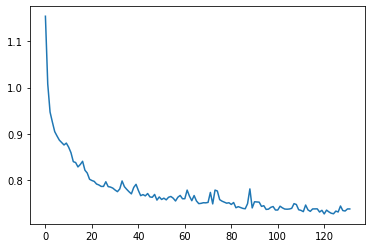

In [27]:
plt.plot(classifier.loss_curve_)
# plt.plot(classifier.validation_scores_)

In [133]:
neuron = 1000
Layer = (neuron,neuron)
classifier2 = MLPClassifier(hidden_layer_sizes = Layer, solver = 'adam',early_stopping=False)
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
neuron = 1000
Layer = (neuron,neuron)
classifier3 = MLPClassifier(hidden_layer_sizes = Layer, solver = 'sgd',early_stopping=False)
classifier3.fit(X_train,y_train)
y_pred = classifier3.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6688622754491018


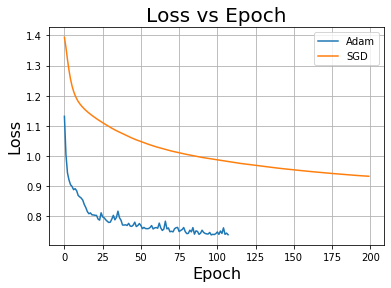

In [147]:
plt.plot(classifier2.loss_curve_, label="Adam")
plt.plot(classifier3.loss_curve_, label="SGD")
plt.xlabel('Experiment No.',fontsize=16)
plt.grid()
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.title('Loss vs Epoch',fontsize=20)
plt.legend()
print(classifier2.score(X_train,y_train))
# plt.plot(classifier2.validation_scores_)

0.6131736526946108


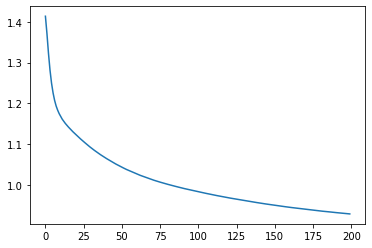

In [31]:
plt.plot(classifier3.loss_curve_)
print(classifier3.score(X_train,y_train))
# plt.plot(classifier2.validation_scores_)

In [177]:
neuron = 1000
Layer = (neuron,neuron)
best_model = MLPClassifier(hidden_layer_sizes = Layer, solver = 'adam')

best_model.fit(X_train,y_train)
y_best_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_best_pred)

confusion = confusion_matrix(y_test, y_best_pred)
print('Confusion Matrix\n')
print(confusion)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix

[[391 125   4   1]
 [ 84 827 177   5]
 [  8 352 348  36]
 [  0  22  81  46]]


In [178]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.82      0.71      0.76       521
     Class 2       0.54      0.84      0.65      1093
     Class 3       0.55      0.27      0.36       744
     Class 4       0.00      0.00      0.00       149

    accuracy                           0.59      2507
   macro avg       0.48      0.45      0.44      2507
weighted avg       0.57      0.59      0.55      2507



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [181]:
report = classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4'],output_dict=True)
df4 = pd.DataFrame(report).transpose()
df4.to_excel("Classification_Rep.xlsx")  

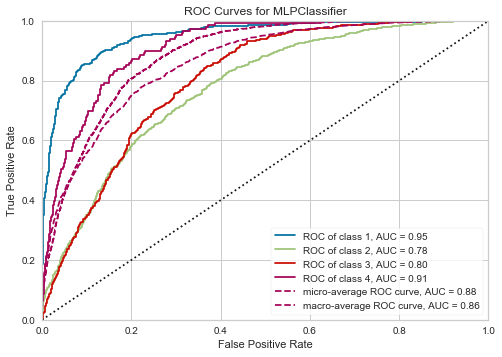

In [155]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

visualizer = ROCAUC(best_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [34]:
Neuron_df.to_excel("Neuron_Comparison.xlsx")  
LR_df.to_excel("SGD-Learning_Rate.xlsx")  
Layers_df.to_excel("Layers_Comparison.xlsx")  
Solvers_df.to_excel("Solver_Comparison.xlsx")  

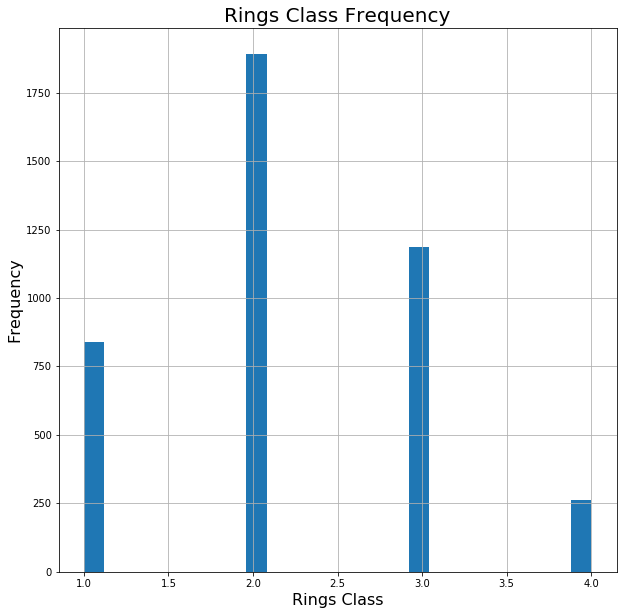

In [35]:
plot_title = 'Rings Class'+freq
plot_save = directory+'Rings_Class'+img_ext
plt.figure(figsize=(10,10))
df['Rings_Class'].plot(kind='hist', bins=25)
plt.xlabel('Rings Class',fontsize=16)
plt.grid()
plt.ylabel('Frequency',fontsize=16)
plt.title(plot_title,fontsize=20)
plt.savefig(plot_save)

In [37]:
# data2 = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# scaler = MinMaxScaler()
# print(scaler.fit(data))


In [ ]:
data

In [120]:
# Neuron_df.to_excel("Neuron_Comparison.xlsx")  
# LR_df.to_excel("SGD-Learning_Rate.xlsx")  
# Layers_df.to_excel("Layers_Comparison.xlsx")  
# Solvers_df.to_excel("Solver_Comparison.xlsx")  


Neuron_df = pd.read_excel("Neuron_Comparison.xlsx")
LR_df = pd.read_excel("SGD-Learning_Rate.xlsx")
Layers_df = pd.read_excel("Layers_Comparison.xlsx")
Solvers_df = pd.read_excel("Solver_Comparison.xlsx")

In [38]:
Ndf2 = Neuron_df[:-3]

In [51]:
Ndf2['Unnamed: 0'] = Ndf2['Unnamed: 0'] +1
Ndf2

Unnamed: 0  5 Neurons  10 Neurons  15 Neurons  20 Neurons  25 Neurons  \
0           1   0.599521    0.590746    0.605903    0.601915    0.607898   
1           2   0.603909    0.595134    0.607898    0.604308    0.607499   
2           3   0.595134    0.589549    0.606701    0.602712    0.615477   
3           4   0.590746    0.599122    0.603909    0.609892    0.601915   
4           5   0.602314    0.609493    0.598325    0.609892    0.594735   
5           6   0.573993    0.603111    0.604308    0.611089    0.608696   
6           7   0.553251    0.606701    0.607499    0.603111    0.608297   
7           8   0.594735    0.595931    0.601117    0.606302    0.603111   
8           9   0.599521    0.604308    0.604707    0.599521    0.610690   
9          10   0.593538    0.603510    0.603909    0.608297    0.609493   

   50 Neurons  100 Neurons  250 Neurons  500 Neurons  1000 Neurons    Name  
0    0.609493     0.615876     0.634224     0.633426      0.627044   Exp 1  
1    0.611488     0.619465     0.630634     0.626645      0.648983   Exp 2  
2    0.609095     0.619067     0.621859     0.630235      0.632629   Exp 3  
3    0.609493     0.619864     0.624651     0.629039      0.633825   Exp 4  
4    0.611089     0.613881     0.630634     0.630235      0.635022   Exp 5  
5    0.613881     0.617870     0.626247     0.632230      0.631831   Exp 6  
6    0.609892     0.618269     0.626645     0.630634      0.631432   Exp 7  
7    0.610690     0.617471     0.626247     0.631432      0.637415   Exp 8  
8    0.612286     0.612286     0.627044     0.628241      0.626247   Exp 9  
9    0.614679     0.615876     0.623454     0.629039      0.628241  Exp 10

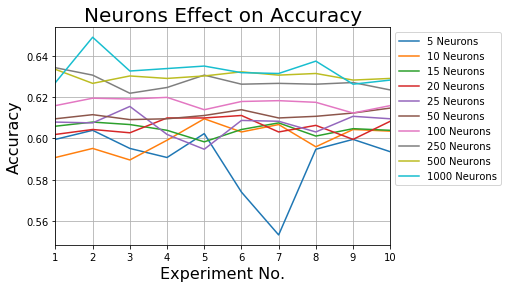

<Figure size 1080x1080 with 0 Axes>

In [57]:
ax = plt.gca()
Ndf2.plot(kind='line',x='Unnamed: 0',y='5 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='10 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='15 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='20 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='25 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='50 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='100 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='250 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='500 Neurons',ax=ax)
Ndf2.plot(kind='line',x='Unnamed: 0',y='1000 Neurons',ax=ax)
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 1))

plt.xlabel('Experiment No.',fontsize=16)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
plt.title('Neurons Effect on Accuracy',fontsize=20)
plt.savefig('test.png')
plt.figure(figsize=(15,15))

plt.show()

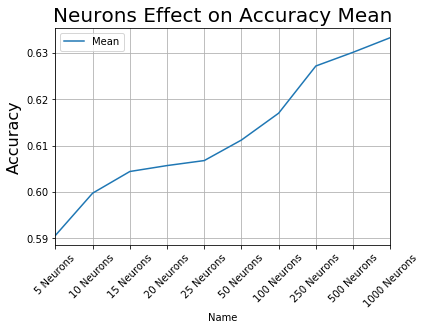

<Figure size 1080x1080 with 0 Axes>

In [87]:
dft = Neuron_df.T
dft.columns = dft.iloc[11]
dft = dft[:-1]
dft = dft.iloc[1:]
dft.reset_index(inplace = True)
dft.columns = ['Name','Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10','Mean','Lower', 'Upper']

dft.plot(kind='line',x='Name',y='Mean')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
plt.title('Neurons Effect on Accuracy Mean',fontsize=20)
plt.savefig('test.png')
plt.figure(figsize=(15,15))
plt.show()

In [81]:
dft

Name    Exp 1    Exp 2    Exp 3    Exp 4    Exp 5    Exp 6  \
0     5 Neurons 0.599521 0.603909 0.595134 0.590746 0.602314 0.573993   
1    10 Neurons 0.590746 0.595134 0.589549 0.599122 0.609493 0.603111   
2    15 Neurons 0.605903 0.607898 0.606701 0.603909 0.598325 0.604308   
3    20 Neurons 0.601915 0.604308 0.602712 0.609892 0.609892 0.611089   
4    25 Neurons 0.607898 0.607499 0.615477 0.601915 0.594735 0.608696   
5    50 Neurons 0.609493 0.611488 0.609095 0.609493 0.611089 0.613881   
6   100 Neurons 0.615876 0.619465 0.619067 0.619864 0.613881 0.617870   
7   250 Neurons 0.634224 0.630634 0.621859 0.624651 0.630634 0.626247   
8   500 Neurons 0.633426 0.626645 0.630235 0.629039 0.630235 0.632230   
9  1000 Neurons 0.627044 0.648983 0.632629 0.633825 0.635022 0.631831   

     Exp 7    Exp 8    Exp 9   Exp 10     Mean    Lower    Upper  
0 0.553251 0.594735 0.599521 0.593538 0.590666 0.579506 0.601826  
1 0.606701 0.595931 0.604308 0.603510 0.599761 0.594927 0.604594  
2 0.607499 0.601117 0.604707 0.603909 0.604428 0.602326 0.606529  
3 0.603111 0.606302 0.599521 0.608297 0.605704 0.602869 0.608539  
4 0.608297 0.603111 0.610690 0.609493 0.606781 0.602733 0.610829  
5 0.609892 0.610690 0.612286 0.614679 0.611209 0.609843 0.612574  
6 0.618269 0.617471 0.612286 0.615876 0.616992 0.615214 0.618771  
7 0.626645 0.626247 0.627044 0.623454 0.627164 0.624507 0.629821  
8 0.630634 0.631432 0.628241 0.629039 0.630116 0.628698 0.631533  
9 0.631432 0.637415 0.626247 0.628241 0.633267 0.628578 0.637956

In [93]:
LR_df

Unnamed: 0     0.01    0.001   0.0001  0.00005  0.00001    1e-06    Name
0            0 0.607100 0.573195 0.435979 0.435979 0.435979 0.223375   Exp 1
1            1 0.606302 0.577184 0.435979 0.435979 0.435979 0.062226   Exp 2
2            2 0.605505 0.577583 0.435979 0.435979 0.435979 0.167531   Exp 3
3            3 0.605505 0.582369 0.435979 0.435979 0.435979 0.296769   Exp 4
4            4 0.607898 0.581572 0.435979 0.435979 0.435979 0.071400   Exp 5
5            5 0.605903 0.579577 0.435979 0.435979 0.436777 0.297567   Exp 6
6            6 0.608696 0.575987 0.435979 0.435979 0.435979 0.059035   Exp 7
7            7 0.608696 0.581572 0.435979 0.435979 0.435979 0.216594   Exp 8
8            8 0.604308 0.579577 0.435979 0.435979 0.449940 0.393299   Exp 9
9            9 0.605505 0.575987 0.435979 0.435979 0.435979 0.132828  Exp 10
10          10 0.606542 0.578460 0.435979 0.435979 0.437455 0.192062    Mean
11          11 0.605472 0.576334 0.435979 0.435979 0.434312 0.110361   Lower
12          12 0.607611 0.580586 0.435979 0.435979 0.440598 0.273764   Upper

In [96]:
LRdf2 = LR_df[:-3]
LRstring2 = ['Exp','0.01', '0.001', '0.0001', '0.00005', '0.00001','0.000001', 'Name']
LRdf2.columns = LRstring2
LRdf2['Exp'] = LRdf2['Exp'] +1
LRdf2.columns = LRstring2

In [97]:
LRdf2

Exp     0.01    0.001   0.0001  0.00005  0.00001  0.000001    Name
0    1 0.607100 0.573195 0.435979 0.435979 0.435979  0.223375   Exp 1
1    2 0.606302 0.577184 0.435979 0.435979 0.435979  0.062226   Exp 2
2    3 0.605505 0.577583 0.435979 0.435979 0.435979  0.167531   Exp 3
3    4 0.605505 0.582369 0.435979 0.435979 0.435979  0.296769   Exp 4
4    5 0.607898 0.581572 0.435979 0.435979 0.435979  0.071400   Exp 5
5    6 0.605903 0.579577 0.435979 0.435979 0.436777  0.297567   Exp 6
6    7 0.608696 0.575987 0.435979 0.435979 0.435979  0.059035   Exp 7
7    8 0.608696 0.581572 0.435979 0.435979 0.435979  0.216594   Exp 8
8    9 0.604308 0.579577 0.435979 0.435979 0.449940  0.393299   Exp 9
9   10 0.605505 0.575987 0.435979 0.435979 0.435979  0.132828  Exp 10

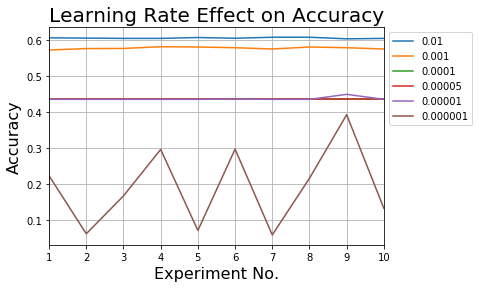

<Figure size 1080x1080 with 0 Axes>

In [99]:
ax = plt.gca()
LRdf2.plot(kind='line',x='Exp',y='0.01',ax=ax)
LRdf2.plot(kind='line',x='Exp',y='0.001',ax=ax)
LRdf2.plot(kind='line',x='Exp',y='0.0001',ax=ax)
LRdf2.plot(kind='line',x='Exp',y='0.00005',ax=ax)
LRdf2.plot(kind='line',x='Exp',y='0.00001',ax=ax)
LRdf2.plot(kind='line',x='Exp',y='0.000001',ax=ax)

plt.legend(loc='upper left',bbox_to_anchor=(1.0, 1))

plt.xlabel('Experiment No.',fontsize=16)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
plt.title('Learning Rate Effect on Accuracy',fontsize=20)
plt.savefig('test.png')
plt.figure(figsize=(15,15))

plt.show()

In [111]:
dft2 = LR_df.T
dft2.columns = dft2.iloc[7]
dft2 = dft2[:-1]
dft2 = dft2.iloc[1:]
dft2.reset_index(inplace = True)
dft2.columns = ['Name','Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10','Mean','Lower', 'Upper']
dft2

Name    Exp 1    Exp 2    Exp 3    Exp 4    Exp 5    Exp 6    Exp 7  \
0     0.01 0.607100 0.606302 0.605505 0.605505 0.607898 0.605903 0.608696   
1    0.001 0.573195 0.577184 0.577583 0.582369 0.581572 0.579577 0.575987   
2   0.0001 0.435979 0.435979 0.435979 0.435979 0.435979 0.435979 0.435979   
3  0.00005 0.435979 0.435979 0.435979 0.435979 0.435979 0.435979 0.435979   
4  0.00001 0.435979 0.435979 0.435979 0.435979 0.435979 0.436777 0.435979   
5 0.000001 0.223375 0.062226 0.167531 0.296769 0.071400 0.297567 0.059035   

     Exp 8    Exp 9   Exp 10     Mean    Lower    Upper  
0 0.608696 0.604308 0.605505 0.606542 0.605472 0.607611  
1 0.581572 0.579577 0.575987 0.578460 0.576334 0.580586  
2 0.435979 0.435979 0.435979 0.435979 0.435979 0.435979  
3 0.435979 0.435979 0.435979 0.435979 0.435979 0.435979  
4 0.435979 0.449940 0.435979 0.437455 0.434312 0.440598  
5 0.216594 0.393299 0.132828 0.192062 0.110361 0.273764

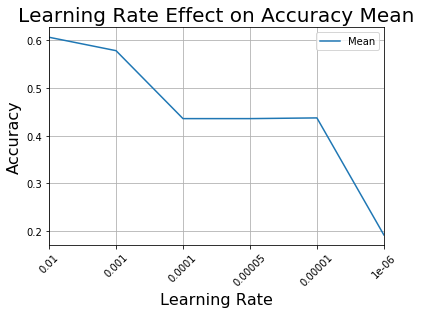

<Figure size 1080x1080 with 0 Axes>

In [114]:

dft2.plot(kind='line',x='Name',y='Mean')
plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
plt.xlabel('Learning Rate',fontsize=16)
plt.title('Learning Rate Effect on Accuracy Mean',fontsize=20)
plt.savefig('test.png')
plt.figure(figsize=(15,15))
plt.show()

In [117]:
Layers_df

Unnamed: 0  1 Layer  2 Layers  3 Layers  4 Layers    Name
0            0 0.620263  0.639809  0.637415  0.638612   Exp 1
1            1 0.629836  0.643398  0.640606  0.645792   Exp 2
2            2 0.630235  0.650977  0.644196  0.617870   Exp 3
3            3 0.636617  0.649781  0.644994  0.642601   Exp 4
4            4 0.631432  0.641404  0.628640  0.645792   Exp 5
5            5 0.645792  0.631831  0.645393  0.627443   Exp 6
6            6 0.634623  0.636617  0.645792  0.641404   Exp 7
7            7 0.640606  0.632629  0.642202  0.649382   Exp 8
8            8 0.635820  0.650578  0.615876  0.643398   Exp 9
9            9 0.632230  0.642202  0.646590  0.643797  Exp 10
10          10 0.633746  0.641923  0.639170  0.639609    Mean
11          11 0.628844  0.636909  0.632159  0.632708   Lower
12          12 0.638647  0.646936  0.646182  0.646510   Upper

In [123]:
Ldf2 = Layers_df[:-3]
Lstring2 = ['Exp','1 Layer','2 Layers','3 Layers','4 Layers', 'Name']
Ldf2.columns = Lstring2
Ldf2['Exp'] = Ldf2['Exp'] +1
Ldf2.columns = Lstring2
Ldf2

Exp  1 Layer  2 Layers  3 Layers  4 Layers    Name
0    1 0.620263  0.639809  0.637415  0.638612   Exp 1
1    2 0.629836  0.643398  0.640606  0.645792   Exp 2
2    3 0.630235  0.650977  0.644196  0.617870   Exp 3
3    4 0.636617  0.649781  0.644994  0.642601   Exp 4
4    5 0.631432  0.641404  0.628640  0.645792   Exp 5
5    6 0.645792  0.631831  0.645393  0.627443   Exp 6
6    7 0.634623  0.636617  0.645792  0.641404   Exp 7
7    8 0.640606  0.632629  0.642202  0.649382   Exp 8
8    9 0.635820  0.650578  0.615876  0.643398   Exp 9
9   10 0.632230  0.642202  0.646590  0.643797  Exp 10

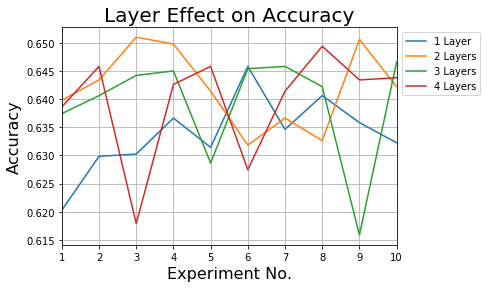

<Figure size 1080x1080 with 0 Axes>

In [124]:
ax = plt.gca()
Ldf2.plot(kind='line',x='Exp',y='1 Layer',ax=ax)
Ldf2.plot(kind='line',x='Exp',y='2 Layers',ax=ax)
Ldf2.plot(kind='line',x='Exp',y='3 Layers',ax=ax)
Ldf2.plot(kind='line',x='Exp',y='4 Layers',ax=ax)

plt.legend(loc='upper left',bbox_to_anchor=(1.0, 1))

plt.xlabel('Experiment No.',fontsize=16)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
plt.title('Layer Effect on Accuracy',fontsize=20)
plt.figure(figsize=(15,15))

plt.show()

In [127]:

dft2

0        1        2        3        4        5        6  \
Unnamed: 0        1        2        3        4        5        6        7   
1 Layer    0.620263 0.629836 0.630235 0.636617 0.631432 0.645792 0.634623   
2 Layers   0.639809 0.643398 0.650977 0.649781 0.641404 0.631831 0.636617   
3 Layers   0.637415 0.640606 0.644196 0.644994 0.628640 0.645393 0.645792   
4 Layers   0.638612 0.645792 0.617870 0.642601 0.645792 0.627443 0.641404   
Name          Exp 1    Exp 2    Exp 3    Exp 4    Exp 5    Exp 6    Exp 7   

                  7        8        9       10       11       12  
Unnamed: 0        8        9       10       10       11       12  
1 Layer    0.640606 0.635820 0.632230 0.633746 0.628844 0.638647  
2 Layers   0.632629 0.650578 0.642202 0.641923 0.636909 0.646936  
3 Layers   0.642202 0.615876 0.646590 0.639170 0.632159 0.646182  
4 Layers   0.649382 0.643398 0.643797 0.639609 0.632708 0.646510  
Name          Exp 8    Exp 9   Exp 10     Mean    Lower    Upper

In [129]:
dft2 = Layers_df.T
dft2.columns = dft2.iloc[5]
dft2 = dft2[:-1]
dft2 = dft2.iloc[1:]
dft2.reset_index(inplace = True)
dft2.columns = ['Name','Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10','Mean','Lower', 'Upper']
dft2

Name    Exp 1    Exp 2    Exp 3    Exp 4    Exp 5    Exp 6    Exp 7  \
0   1 Layer 0.620263 0.629836 0.630235 0.636617 0.631432 0.645792 0.634623   
1  2 Layers 0.639809 0.643398 0.650977 0.649781 0.641404 0.631831 0.636617   
2  3 Layers 0.637415 0.640606 0.644196 0.644994 0.628640 0.645393 0.645792   
3  4 Layers 0.638612 0.645792 0.617870 0.642601 0.645792 0.627443 0.641404   

     Exp 8    Exp 9   Exp 10     Mean    Lower    Upper  
0 0.640606 0.635820 0.632230 0.633746 0.628844 0.638647  
1 0.632629 0.650578 0.642202 0.641923 0.636909 0.646936  
2 0.642202 0.615876 0.646590 0.639170 0.632159 0.646182  
3 0.649382 0.643398 0.643797 0.639609 0.632708 0.646510

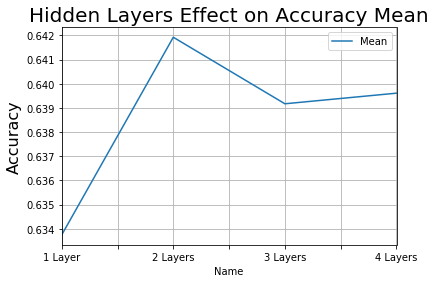

<Figure size 1080x1080 with 0 Axes>

In [132]:
dft2.plot(kind='line',x='Name',y='Mean')
# plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
# plt.xlabel('Learning Rate',fontsize=16)
plt.title('Hidden Layers Effect on Accuracy Mean',fontsize=20)
plt.savefig('test.png')
plt.figure(figsize=(15,15))
plt.show()

In [137]:
Solvers_df = pd.read_excel("Solver_Comparison.xlsx")
Solvers_df

Unnamed: 0      sgd     adam    Name
0            0 0.589150 0.630235   Exp 1
1            1 0.588353 0.652972   Exp 2
2            2 0.590347 0.639011   Exp 3
3            3 0.591943 0.638612   Exp 4
4            4 0.589948 0.633028   Exp 5
5            5 0.590746 0.643797   Exp 6
6            6 0.586358 0.651775   Exp 7
7            7 0.591145 0.634623   Exp 8
8            8 0.587555 0.648584   Exp 9
9            9 0.588353 0.650578  Exp 10
10          10 0.589390 0.642321    Mean
11          11 0.588141 0.636342   Lower
12          12 0.590639 0.648301   Upper

In [138]:
sf2 = Solvers_df[:-3]
Sstring2 = ['Exp','SGD','Adam', 'Name']
sf2.columns = Sstring2
sf2['Exp'] = sf2['Exp'] +1
sf2

Exp      SGD     Adam    Name
0    1 0.589150 0.630235   Exp 1
1    2 0.588353 0.652972   Exp 2
2    3 0.590347 0.639011   Exp 3
3    4 0.591943 0.638612   Exp 4
4    5 0.589948 0.633028   Exp 5
5    6 0.590746 0.643797   Exp 6
6    7 0.586358 0.651775   Exp 7
7    8 0.591145 0.634623   Exp 8
8    9 0.587555 0.648584   Exp 9
9   10 0.588353 0.650578  Exp 10

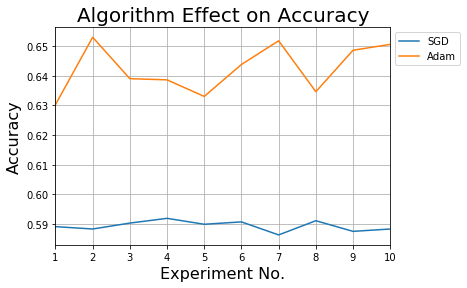

<Figure size 1080x1080 with 0 Axes>

In [140]:
ax = plt.gca()
sf2.plot(kind='line',x='Exp',y='SGD',ax=ax)
sf2.plot(kind='line',x='Exp',y='Adam',ax=ax)


plt.legend(loc='upper left',bbox_to_anchor=(1.0, 1))

plt.xlabel('Experiment No.',fontsize=16)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
plt.title('Algorithm Effect on Accuracy',fontsize=20)
plt.figure(figsize=(15,15))

plt.show()

In [141]:
dft2 = Solvers_df.T
dft2

0        1        2        3        4        5        6  \
Unnamed: 0        1        2        3        4        5        6        7   
sgd        0.589150 0.588353 0.590347 0.591943 0.589948 0.590746 0.586358   
adam       0.630235 0.652972 0.639011 0.638612 0.633028 0.643797 0.651775   
Name          Exp 1    Exp 2    Exp 3    Exp 4    Exp 5    Exp 6    Exp 7   

                  7        8        9       10       11       12  
Unnamed: 0        8        9       10       10       11       12  
sgd        0.591145 0.587555 0.588353 0.589390 0.588141 0.590639  
adam       0.634623 0.648584 0.650578 0.642321 0.636342 0.648301  
Name          Exp 8    Exp 9   Exp 10     Mean    Lower    Upper

In [142]:
dft2.columns = dft2.iloc[3]
dft2 = dft2[:-1]
dft2 = dft2.iloc[1:]
dft2.reset_index(inplace = True)
dft2.columns = ['Name','Exp 1','Exp 2','Exp 3','Exp 4','Exp 5','Exp 6','Exp 7','Exp 8','Exp 9','Exp 10','Mean','Lower', 'Upper']
dft2

Name    Exp 1    Exp 2    Exp 3    Exp 4    Exp 5    Exp 6    Exp 7  \
0   sgd 0.589150 0.588353 0.590347 0.591943 0.589948 0.590746 0.586358   
1  adam 0.630235 0.652972 0.639011 0.638612 0.633028 0.643797 0.651775   

     Exp 8    Exp 9   Exp 10     Mean    Lower    Upper  
0 0.591145 0.587555 0.588353 0.589390 0.588141 0.590639  
1 0.634623 0.648584 0.650578 0.642321 0.636342 0.648301

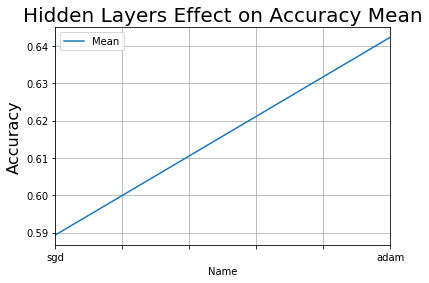

<Figure size 1080x1080 with 0 Axes>

In [143]:
dft2.plot(kind='line',x='Name',y='Mean')
# plt.xticks(rotation=45)
plt.grid()
plt.ylabel('Accuracy',fontsize=16)
# plt.xlabel('Learning Rate',fontsize=16)
plt.title('Hidden Layers Effect on Accuracy Mean',fontsize=20)
plt.savefig('test.png')
plt.figure(figsize=(15,15))
plt.show()